# Importing libraries

In [482]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
from scipy.stats import norm
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2

# Importing dataset

In [483]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_sample = pd.read_csv('sample_submission.csv')

# Exploratory data analysis

In [484]:
data_train.head()
#data_test.head()
#data_sample.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


The **data_train** dataset contains informations about passengers aboard the Spaceship Titanic. Key features include **PassengerId** (unique identifier), **HomePlanet** (planet of origin), **CryoSleep** (boolean indicating if the passenger was in cryogenic sleep), **Cabin** (cabin details including deck, number, and side), **Destination** (final destination), **Age**, **VIP status** , and various amenities such as **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, and **VRDeck**. The **Name** column contains passenger names. The target variable **Transported** indicates whether a passenger was transported by the space-time anomaly. Initial exploration suggests a diverse range of passengers with varying amenities usage and VIP status.

In [485]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


The summary statistics of numerical features indicate that the dataset contains information on passengers with an average age of approximately 28.83 years old.

The amenities such as **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, and **VRDeck** show varying usage levels, with mean values ranging from around 224 to 458.

The standard deviations are relatively high, suggesting a wide dispersion in the usage of these amenities.

Additionally, the minimum values indicate that some passengers did not utilize these amenities at all, while the maximum values reflect the highest recorded usage levels.

The quartile values provide insight into the distribution of these features across the dataset.

In [486]:
data_train.describe(include=['O'])
#id cabin name

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


The summary statistics of categorical features indicate that the dataset includes information on 8693 unique passengers. The HomePlanet feature has three unique values, with 'Earth' being the most common, occurring 4602 times. The CryoSleep feature is binary, with the majority of passengers (5439) not in cryogenic sleep. The Cabin feature has a high cardinality, with 6560 unique values. The most frequent cabin designation is 'G/734/S', occurring 8 times. The Destination feature has three unique values, with 'TRAPPIST-1e' being the most common destination, occurring 5915 times. The VIP feature is binary, with the majority of passengers (8291) not being VIPs. The Name feature has 8473 unique values, with 'Gollux Reedall' being the most frequent name, occurring twice.

In [487]:
data_train.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


This provides insight into the distribution of data regarding individuals' home planets in the DataFrame.

In [488]:
data_train['Transported'] = data_train['Transported'].map({True: 1, False: 0}).astype(int)
data_train[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)
#moyenne de non-transported par planetes de départ

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


The analysis shows that passengers from Europa have the highest proportion of being transported (approximately 65.88%), followed by passengers from Mars (approximately 52.30%), and Earth (approximately 42.39%). This suggests a potential correlation between the planet of origin and the likelihood of being transported by the space-time anomaly.

In [489]:
print(data_train.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [490]:
print(data_train.isnull().sum(axis=1))

0       0
1       0
2       0
3       0
4       0
       ..
8688    0
8689    0
8690    0
8691    0
8692    0
Length: 8693, dtype: int64


In [491]:
# Checking the number of missing values in each column
missing_values = data_train.isnull().sum()

# Calculating the percentage of missing values for each column
missing_percentage = (data_train.isnull().sum() / len(data_train)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})

# Filtering out columns with no missing values
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

missing_data

,Missing Values,Percentage (%)
CryoSleep,217,2.496261
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639


The code calculates the number and percentage of missing values for each column in the data_train dataset. The table is sorted in descending order based on the percentage of missing values.

The analysis reveals that the feature 'CryoSleep' has the highest percentage of missing values (approximately 2.50%), followed by 'ShoppingMall' (approximately 2.39%) and 'VIP' (approximately 2.34%). Other features such as 'HomePlanet', 'Name', 'Cabin', and 'VRDeck' also exhibit a non-negligible percentage of missing values.

These results highlight the need for appropriate handling of missing data during data preprocessing to ensure the reliability of subsequent analyses.

Thus, we can replace the missing values by the mean of the colums if the data is numerical, and by the most frequence value if it is not.

In [492]:
data_num = data_train[["PassengerId", "Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
data_str = data_train[["HomePlanet", "Cabin", "Destination", "Name"]]
data_bool = data_train[["CryoSleep", "VIP", "Transported"]] #pas de missing values dans transported

#remplacement valeurs manquante de data_num
imputer = SimpleImputer(strategy="mean")
imputer.fit(data_num)
X = imputer.transform(data_num)
data_num_tr = pd.DataFrame(X, columns = data_num.columns)

#remplacement valeurs manquante de data_str
imputer_str = SimpleImputer(strategy="most_frequent")
imputer_str.fit(data_str)
Y = imputer_str.transform(data_str)
data_str_tr = pd.DataFrame(Y, columns=data_str.columns)

#remplacement valeurs manquante de data_str
imputer_bool = SimpleImputer(strategy="most_frequent")
imputer_bool.fit(data_bool)
Z = imputer_bool.transform(data_bool)
data_bool_tr = pd.DataFrame(Z, columns=data_bool.columns)

data_train_tr = pd.concat([data_num_tr, data_str_tr, data_bool_tr], axis=1)

print(data_num_tr)
print(data_str_tr)
print(data_bool_tr)
print(data_train_tr)


      PassengerId   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0           101.0  39.0          0.0        0.0           0.0     0.0     0.0
1           201.0  24.0        109.0        9.0          25.0   549.0    44.0
2           301.0  58.0         43.0     3576.0           0.0  6715.0    49.0
3           302.0  33.0          0.0     1283.0         371.0  3329.0   193.0
4           401.0  16.0        303.0       70.0         151.0   565.0     2.0
...           ...   ...          ...        ...           ...     ...     ...
8688     927601.0  41.0          0.0     6819.0           0.0  1643.0    74.0
8689     927801.0  18.0          0.0        0.0           0.0     0.0     0.0
8690     927901.0  26.0          0.0        0.0        1872.0     1.0     0.0
8691     928001.0  32.0          0.0     1049.0           0.0   353.0  3235.0
8692     928002.0  44.0        126.0     4688.0           0.0     0.0    12.0

[8693 rows x 7 columns]
     HomePlanet     Cabin    Destinatio

C:\Users\valen\AppData\Local\Temp\ipykernel_6612\3653671273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stand["Dépense"] = stand[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)


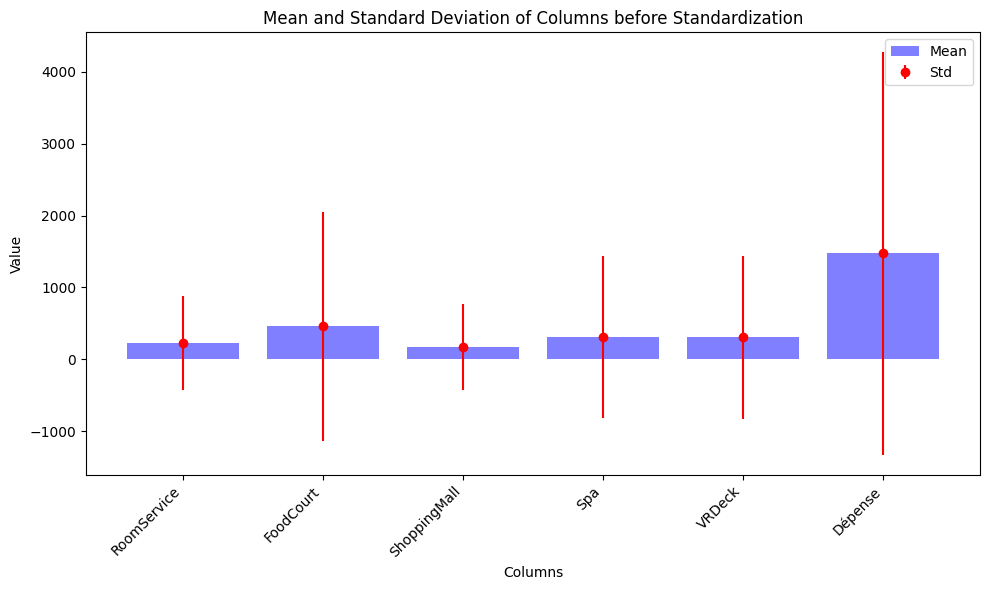

In [493]:
stand = data_num_tr[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
stand["Dépense"] = stand[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

means = stand.mean()
stds = stand.std()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(means.index, means, color='blue', alpha=0.5, label='Mean')

ax.errorbar(means.index, means, yerr=stds, fmt='o', color='red', label='Std')

ax.set_title('Mean and Standard Deviation of Columns before Standardization')
ax.set_xlabel('Columns')
ax.set_ylabel('Value')
ax.legend()

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Il faut grave standardiser la c'est urgent

In [494]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
data_num_stand = scaler.fit_transform(stand)
data_num_stand = pd.DataFrame(data_num_stand, columns=stand.columns)

print(data_num_stand)

a = data_num_tr[["PassengerId", "Age"]]
data_num_tr = pd.concat([a, data_num_stand], axis=1)

print(data_num_tr)


data_train_tr = pd.concat([data_num_tr, data_str_tr, data_bool_tr], axis=1)



      RoomService  FoodCourt  ShoppingMall       Spa    VRDeck   Dépense
0       -0.340590  -0.287314     -0.290817 -0.276663 -0.269023 -0.525934
1       -0.175364  -0.281669     -0.248968  0.211505 -0.230194 -0.263054
2       -0.275409   1.955616     -0.290817  5.694289 -0.225782  3.182605
3       -0.340590   0.517406      0.330225  2.683471 -0.098708  1.322799
4        0.118709  -0.243409     -0.038048  0.225732 -0.267258 -0.136257
...           ...        ...           ...       ...       ...       ...
8688    -0.340590   3.989682     -0.290817  1.184286 -0.203720  2.522904
8689    -0.340590  -0.287314     -0.290817 -0.276663 -0.269023 -0.525934
8690    -0.340590  -0.287314      2.842851 -0.275774 -0.269023  0.143053
8691    -0.340590   0.370637     -0.290817  0.037223  2.585740  1.130282
8692    -0.149594   2.653082     -0.290817 -0.276663 -0.258433  1.197788

[8693 rows x 6 columns]
      PassengerId   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
0           101.0  39.0 

Data Splitting:

The code initially splits the dataset data_train into three separate datasets based on the type of features:
data_num: Contains numerical features such as PassengerId, Age, and various amenities.
data_str: Contains categorical string features like HomePlanet, Cabin, and Name.
data_bool: Contains boolean features including CryoSleep, VIP, and Transported.
Missing Value Imputation:

Missing values in each subset are imputed separately using different strategies:
For data_num, missing values are replaced with the mean value of each column using SimpleImputer with the strategy set to "mean".
For data_str, missing values are replaced with the most frequent value (mode) of each column using SimpleImputer with the strategy set to "most_frequent".
Similarly, for data_bool, missing values are replaced with the most frequent value.
Concatenation:

After imputation, the transformed subsets are concatenated back together along the columns to form the new DataFrame data_train_tr.
Result:

The resulting DataFrame data_train_tr contains all the original columns with missing values replaced. Now, the dataset is ready for further analysis or modeling without any missing values.

In [495]:
print("data_num_tr:\n")
print(data_num_tr.isnull().sum())
print("--------")
print("data_str_tr:\n")
print(data_str_tr.isnull().sum())
print("--------")
print("data_bool_tr:\n")
print(data_bool_tr.isnull().sum())
print("--------")
print("data_train_tr:\n")
print(data_train_tr.isna().sum())

data_num_tr:

PassengerId     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Dépense         0
dtype: int64
--------
data_str_tr:

HomePlanet     0
Cabin          0
Destination    0
Name           0
dtype: int64
--------
data_bool_tr:

CryoSleep      0
VIP            0
Transported    0
dtype: int64
--------
data_train_tr:

PassengerId     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Dépense         0
HomePlanet      0
Cabin           0
Destination     0
Name            0
CryoSleep       0
VIP             0
Transported     0
dtype: int64


After imputation, the code checks for missing values in each subset: For data_num, there are no missing values in any of the columns.
Similarly, for data_str and data_bool, all columns have been successfully imputed, and there are no missing values.
Overall Dataset Check:

The code then checks for missing values in the concatenated dataset data_train_tr. As expected, there are no missing values in any column of the combined dataset.

These results confirm that missing values have been successfully handled through imputation, and the dataset is now complete and ready for further analysis or modeling.

In [496]:
print('Transported' in data_train_tr.columns)

True



The printed statement confirms that the column "Transported" is indeed present in the DataFrame data_train_tr. The boolean value True indicates that the column exists within the DataFrame's columns. This verification is important to ensure that the transformation and concatenation processes did not inadvertently remove or alter the desired columns.

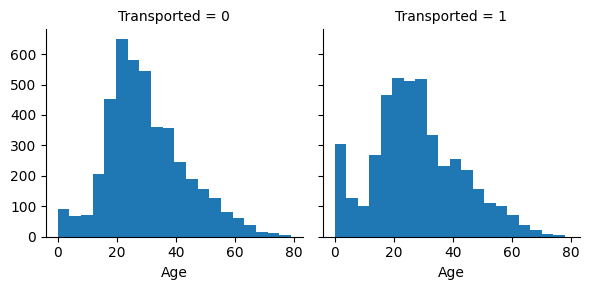

In [497]:
g = sns.FacetGrid(data_train_tr, col='Transported')
g.map(plt.hist, 'Age', bins=20)

*   **Age Distribution and Transported Status :** The concentration of non-transported individuals within the 18 to 40 age range suggests that this demographic may have been more actively involved in the event leading to transportation. Conversely, the broader age distribution among transported individuals, including a peak of newborns, indicates a wider demographic affected by the transportation event ;

*   **Impact of Age on Transported Status :** The presence of newborns among transported individuals may suggest a vulnerability to the transportation phenomenon across all age groups. It could imply that factors other than age alone influence an individual's likelihood of being transported ;

*   **Potential Factors Influencing Transportation :** Further analysis could explore potential factors contributing to transportation, such as occupation, socioeconomic status, or health conditions. Understanding these factors may provide insights into why certain age groups are more affected than others ;

*   **Effectiveness of Rescue Efforts :** The age distribution of transported individuals may also reflect the success of rescue efforts. For example, the presence of newborns could indicate prioritization in rescue operations or differential susceptibility to the transportation phenomenon ;

*   **Long-Term Implications :** The implications of transportation on different age groups, such as psychological effects, societal adaptation, and resettlement challenges, could be explored. Understanding how different age groups cope with and adapt to transportation could inform future rescue and support efforts.

C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


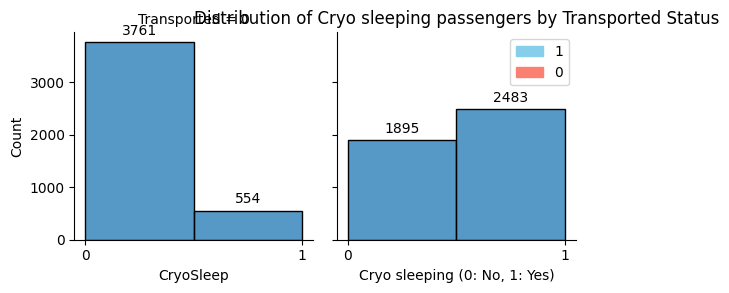

In [498]:
#data_train_tr['VIP'] = data_train_tr['VIP'].map({True: 1, False: 0}).astype(int)
#g = sns.FacetGrid(data_train_tr, col='Transported')
#g.map(plt.hist, 'VIP', bins=20)


# Mapping boolean values to integers (1 for True, 0 for False)
#data_train_tr['VIP'] = data_train_tr['VIP'].map({True: 1, False: 0}).astype(int)

# Defining color palette for 'Transported' values
transported_colors = {1: 'skyblue', 0: 'salmon'}

# Creating the FacetGrid
g = sns.FacetGrid(data_train_tr, col='Transported')

# Plotting the stacked bar chart for VIP status
g.map(sns.histplot, 'CryoSleep', bins=2, multiple="stack", palette=transported_colors)

# Adding labels and title
plt.xlabel('Cryo sleeping (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Distribution of Cryo sleeping passengers by Transported Status')

# Adding legend
handles = [plt.Rectangle((0,0),1,1, color=transported_colors[label]) for label in transported_colors]
plt.legend(handles, transported_colors.keys(), loc='upper right')

# Setting x-axis ticks to be binary values
plt.xticks(ticks=[0, 1])

# Adding numeric values on top of each bar
for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

# Showing the plot
plt.show()

#Améliorer pour avoir la distinction de couleurs

C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


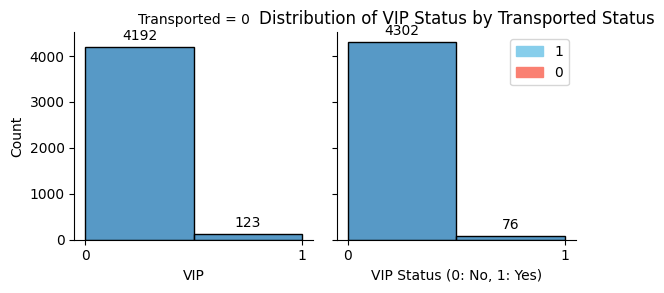

In [499]:
#data_train_tr['VIP'] = data_train_tr['VIP'].map({True: 1, False: 0}).astype(int)
#g = sns.FacetGrid(data_train_tr, col='Transported')
#g.map(plt.hist, 'VIP', bins=20)


# Mapping boolean values to integers (1 for True, 0 for False)
#data_train_tr['VIP'] = data_train_tr['VIP'].map({True: 1, False: 0}).astype(int)

# Defining color palette for 'Transported' values
transported_colors = {1: 'skyblue', 0: 'salmon'}

# Creating the FacetGrid
g = sns.FacetGrid(data_train_tr, col='Transported')

# Plotting the stacked bar chart for VIP status
g.map(sns.histplot, 'VIP', bins=2, multiple="stack", palette=transported_colors)

# Adding labels and title
plt.xlabel('VIP Status (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Distribution of VIP Status by Transported Status')

# Adding legend
handles = [plt.Rectangle((0,0),1,1, color=transported_colors[label]) for label in transported_colors]
plt.legend(handles, transported_colors.keys(), loc='upper right')

# Setting x-axis ticks to be binary values
plt.xticks(ticks=[0, 1])

# Adding numeric values on top of each bar
for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

# Showing the plot
plt.show()

#Améliorer pour avoir la distinction de couleurs

These graphs represent the distribution of VIP status among transported and non-transported passengers. Here are the interpretations:

For non-transported passengers (Transported = 0):

There are 4192 passengers who are not VIP and 123 VIP passengers.
The histogram shows that the majority of non-transported passengers are not VIP, with a significantly higher number of regular passengers compared to VIP ones.
The bar corresponding to VIP passengers is much smaller in comparison, suggesting that there are relatively fewer VIP passengers among those who are not transported.

For transported passengers (Transported = 1) :
There are 4302 passengers who are not VIP and 76 VIP passengers.
Similar to non-transported passengers, the majority of transported passengers are not VIP, with a much larger bar for regular passengers.
However, the difference between the number of regular passengers and VIP passengers is even more pronounced among transported passengers, suggesting that VIP passengers are less likely to be transported compared to regular passengers.
In summary, these graphs indicate a trend where regular passengers are less likely to be transported, suggesting that VIP status may be a determining factor in passenger selection for transportation.







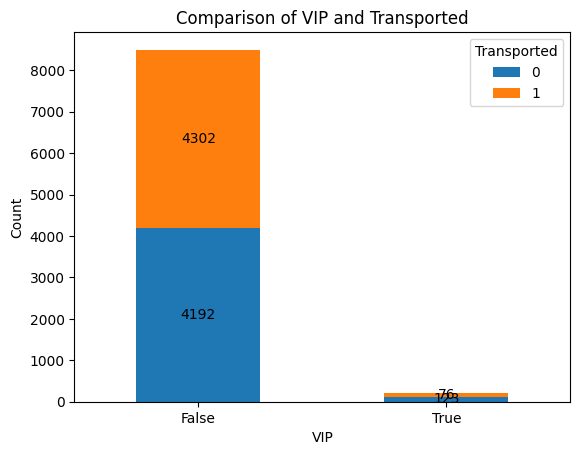

In [500]:
comparison_df = data_train_tr.groupby(['VIP', 'Transported']).size().unstack()

# Créer le graphique à barres empilées
ax = comparison_df.plot(kind='bar', stacked=True)

# Ajouter les valeurs numériques au-dessus de chaque barre
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center')

plt.xlabel('VIP')
plt.ylabel('Count')
plt.title('Comparison of VIP and Transported')
plt.xticks(rotation=0)
plt.show()

# à supprimer ?

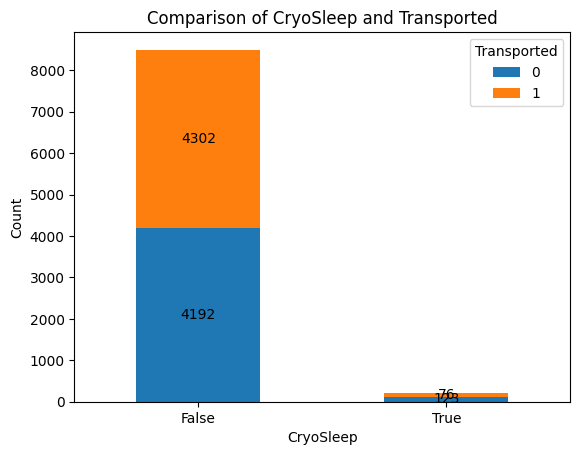

In [501]:
# Créer le graphique à barres empilées
ax = comparison_df.plot(kind='bar', stacked=True)

# Ajouter les valeurs numériques au-dessus de chaque barre
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center')

# Autres paramètres du graphique
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.title('Comparison of CryoSleep and Transported')
plt.xticks(rotation=0)
plt.show()


# à supprimer ?

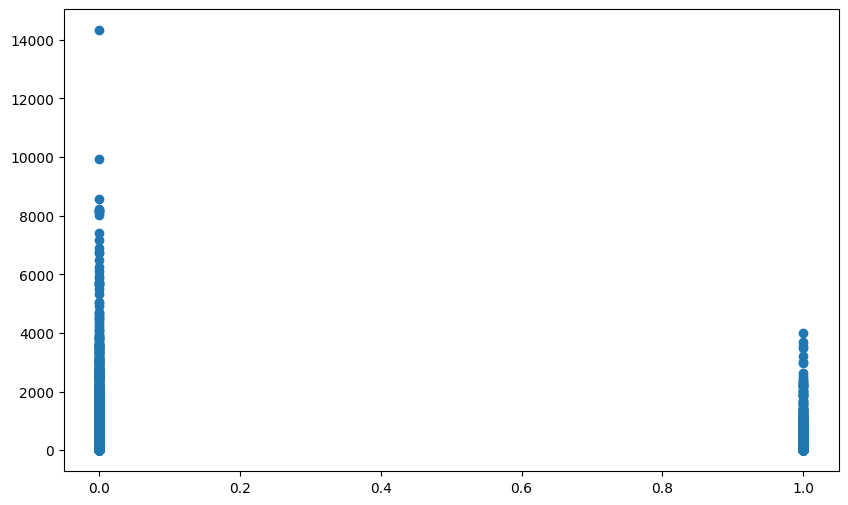

In [502]:
plt.figure(figsize=(10, 6))
plt.scatter(data_train['Transported'], data_train['RoomService'])
#plt.title('Heart Disease by Age')
plt.show()

In [503]:
#plt.figure(figsize=(10, 6))
#plt.scatter(data_train['Transported'], data_train['PassengerId'].astype(str).str.slice(0, 4))
#plt.show()


In [504]:

# Créer une nouvelle colonne pour stocker les noms des colonnes avec des valeurs manquantes
missing_data['Columns with Missing Values'] = data_train.apply(lambda row: row.index[row.isnull()].tolist(), axis=1)

# Filtrer les lignes avec des valeurs manquantes
missing_data = missing_data[missing_data['Missing Values'] > 1]

# Afficher le DataFrame résultant
print(missing_data)



              Missing Values  Percentage (%) Columns with Missing Values
CryoSleep                217        2.496261                         NaN
ShoppingMall             208        2.392730                         NaN
VIP                      203        2.335212                         NaN
HomePlanet               201        2.312205                         NaN
Name                     200        2.300702                         NaN
Cabin                    199        2.289198                         NaN
VRDeck                   188        2.162660                         NaN
FoodCourt                183        2.105142                         NaN
Spa                      183        2.105142                         NaN
Destination              182        2.093639                         NaN
RoomService              181        2.082135                         NaN
Age                      179        2.059128                         NaN


On observe que le maximum de valeurs manquantes par ligne vaut 2. Nous n'avons donc pas besoin de supprimer de ligne du dataset.

In [505]:
columns = {"HomePlanet", "Destination", "Name"}

#def replace

# Data preprocessing

We have to preprocess the data before feeding it to the machine learning models. We will replace the categorical features with numerical ones.

In [506]:
homeplanet_dummies = pd.get_dummies(data_train_tr["HomePlanet"], prefix = "HomePlanet")

destination_dummies = pd.get_dummies(data_train_tr["Destination"], prefix = "Destination")

data_train_tr = pd.concat([data_train_tr, homeplanet_dummies, destination_dummies], axis = 1)


data_train_tr.drop(columns=['Destination'], inplace=True)
data_train_tr.drop(columns=['HomePlanet'], inplace=True)
print(data_train_tr)





      PassengerId   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
0           101.0  39.0    -0.340590  -0.287314     -0.290817 -0.276663   
1           201.0  24.0    -0.175364  -0.281669     -0.248968  0.211505   
2           301.0  58.0    -0.275409   1.955616     -0.290817  5.694289   
3           302.0  33.0    -0.340590   0.517406      0.330225  2.683471   
4           401.0  16.0     0.118709  -0.243409     -0.038048  0.225732   
...           ...   ...          ...        ...           ...       ...   
8688     927601.0  41.0    -0.340590   3.989682     -0.290817  1.184286   
8689     927801.0  18.0    -0.340590  -0.287314     -0.290817 -0.276663   
8690     927901.0  26.0    -0.340590  -0.287314      2.842851 -0.275774   
8691     928001.0  32.0    -0.340590   0.370637     -0.290817  0.037223   
8692     928002.0  44.0    -0.149594   2.653082     -0.290817 -0.276663   

        VRDeck   Dépense     Cabin               Name CryoSleep    VIP  \
0    -0.269023 -0.525934 

categorical variables such as "HomePlanet" and "Destination" are transformed into binary variables. Each unique category in these columns becomes a new column in the DataFrame, with binary values ​​indicating the presence or absence of the category for each observation. For example, if the planets include "Earth", "Mars" and "Europa", three new columns will be created, one for each planet, and each observation will have a 1 in the column corresponding to its planet of origin and a 0 in others.
and we delete the HomePlanet" and "Destination" columns because they are no longer useful


In [507]:
data_train[['Deck', 'Num', 'Side']] = data_train['Cabin'].str.extract(r'([A-G])/(\d+)/([PS])')

deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
data_train['Deck'] = data_train['Deck'].map(deck_mapping)

data_train['Side'] = data_train['Side'].map({'P': 0, 'S': 1})#

data_train['Deck'] = pd.to_numeric(data_train['Deck'])
data_train['Num'] = pd.to_numeric(data_train['Num'])

print(data_train.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  Deck  Num  Side  
0            0   2.0  0.0   0.0  
1            1   6.0  0.0   1.0  
2 

We proceed to divide the "Cabin" column into three distinct columns: "deck", "num", and "side". Next, we transform the letters in the "deck" column into numbers based on their respective position in the alphabet. The 'P' and 'S' values ​​in the "side" column are converted to 0 and 1. The "deck" and "num" columns are also converted to numeric type. Finally, we display the first rows of the transformed data for inspection.


In [508]:

#data_train_tr = pd.concat([data_train_tr, data_train[['Deck', 'Num', 'Side']]], axis=1)

#print(data_train_tr.head())

#data_train_tr.drop(columns=['Cabin'], inplace=True)

In [509]:
# Supposons que df soit votre DataFrame contenant la variable "Cabin"
# Vous pouvez remplacer 'df' par le nom de votre DataFrame

# Appliquer One-Hot Encoding à la variable 'Cabin'
#cabin_dummies = pd.get_dummies(data_train_tr['Cabin'], prefix='Cabin')

# Concaténer les nouvelles variables binaires à votre DataFrame original
#data_train_tr = pd.concat([data_train_tr, cabin_dummies], axis=1)

# Supprimer la colonne 'Cabin' originale si nécessaire
#data_train_tr.drop('Cabin', axis=1, inplace=True)

#print(data_train_tr.head())

we add the “Deck”, “Num” and “Side” columns which now only contain numeric data to data_train_tr

and we remove the cabin column because it is no longer useful

In [510]:
data_train_tr.drop(columns=['Name'], inplace=True)

Deleting the 'name' column can be justified for several reasons. First, it is redundant because the information it contains is already present in other columns in our dataset. In the context of our analysis, where identifying passengers by name is not necessary, the 'name' column becomes irrelevant. We already have other digital characteristics, such as passenger ID, which are more relevant to our analysis.

Second, by removing the 'name' column, we simplify our data analysis model by reducing the number of features to consider. This can make our model easier to interpret and manage, while potentially improving its performance.

However, it is important to note that removing the 'name' column can also result in a reduction in the dimensionality of our dataset. This can have positive implications in terms of calculation time and generalization capacity of our model, reducing the risk of overfitting.


Transforming Boolean Data into Numerical Values


In [511]:

#data_train_tr['VIP'] = data_train['VIP'].replace({True: 1, False: 0})
#data_train_tr['CryoSleep'] = data_train['CryoSleep'].replace({True: 1, False: 0})
#data_train_tr['Transported'] = data_train['Transported'].replace({True: 1, False: 0})

#print(data_train_tr.head())


In this step, we tackle the digitization of the Boolean data present in the dataset. The data_bool variable includes the columns 'VIP', 'Transported', and 'Cryosleep', which contain Boolean values. We proceed to digitize this data by converting it from the value 'True' to '1' and from the value 'False' to '0'.

In [512]:
types_de_donnees = data_train_tr.dtypes
colonnes_nominales = types_de_donnees[types_de_donnees == 'object']
print("Colonnes avec des données nominales :")
print(colonnes_nominales)

types_de_donnees = data_train_tr2.dtypes
colonnes_nominales = types_de_donnees[types_de_donnees == 'object']
print("Colonnes avec des données nominales :")
print(colonnes_nominales)

Colonnes avec des données nominales :
Cabin          object
CryoSleep      object
VIP            object
Transported    object
dtype: object
Colonnes avec des données nominales :
Series([], dtype: object)


our data has been converted to a more appropriate form

1. Only numerical data (absence of nominal and Boolean values)
2. No missing values

In [513]:
#data_train_tr['CryoSleep'] = data_train_tr['CryoSleep'].map({True: 1, False: 0}).astype(int)
#correlation_matrix = data_train_tr[['VIP', 'CryoSleep', 'Transported']].corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation')
#plt.show()


#matrice de coorélation trop chargée
display(data_train_tr.corr())
plt.figure(figsize=(20,10))
sns.heatmap(data_train_tr.corr(), cmap = 'magma', vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation heatmap of the dataset')
plt.show()


ValueError: could not convert string to float: 'B/0/P'

Affichage de la liste des colonnes de notre data

In [ ]:
print(data_train_tr.columns)

Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Dépense', 'Cabin', 'CryoSleep', 'VIP', 'Transported',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e'],
      dtype='object')


Matrice de coorélation

<ipython-input-34-5310489cfc7a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_train_tr.corr()


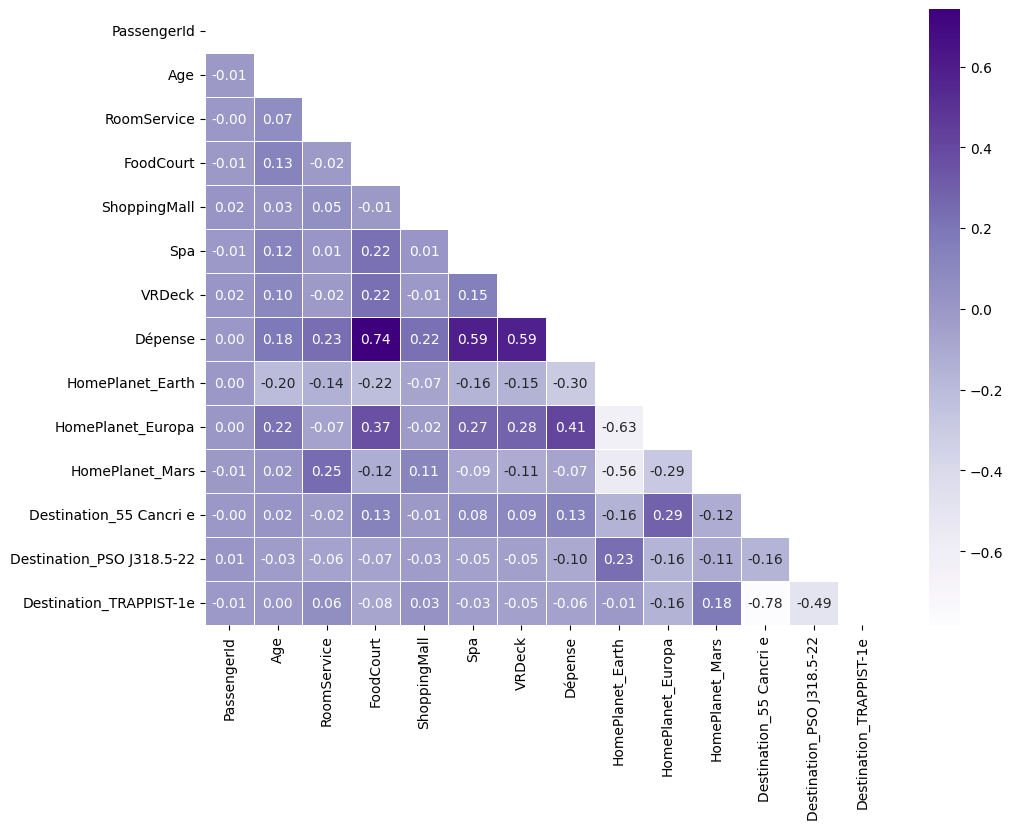

In [ ]:
corr = data_train_tr.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(corr))
plt.show()

This correlation matrix presents the linear relationships between different variables in the dataset. Here are some key observations:

*  ** Age :** Shows a slight positive correlation with 'FoodCourt' and 'Spa', suggesting that older individuals might tend to use dining and spa services more frequently ;

*   **RoomService :** Exhibits a moderate negative correlation with 'CryoSleep' and 'VIP', indicating that passengers who do not use room service tend not to be VIP and not in cryogenic hibernation ;

*   **FoodCourt :** Shows a significant positive correlation with 'Spa' and 'ShoppingMall', suggesting that individuals who often use food services may also use spa services and engage in shopping ;

*   **VRDeck :** Displays a moderate correlation with 'Spa' and 'FoodCourt', indicating that passengers who enjoy the virtual reality deck are also inclined to use other recreational facilities ;

*   **CryoSleep :** Notably negatively correlated with most other variables, indicating that passengers in cryogenic hibernation tend to use other onboard services less ;

*   **VIP :** Demonstrates a moderate correlation with 'Age' and 'Spa', suggesting that VIP passengers may be older and tend to use spa services.

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026,-0.248717,-0.131926,0.011851
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611,-0.027104,-0.008767,-0.012666
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566,-0.325177,-0.183138,0.020482
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141,-0.032735,0.001565,-0.021129
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131,-0.231221,-0.130646,0.003023
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075,-0.258032,-0.138821,-0.008075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000,-0.116033,-0.045548,0.103713
Deck,-0.248717,-0.027104,-0.325177,-0.032735,-0.231221,-0.258032,-0.116033,1.000000,0.533068,-0.033989
Num,-0.131926,-0.008767,-0.183138,0.001565,-0.130646,-0.138821,-0.045548,0.533068,1.000000,-0.038443
Side,0.011851,-0.012666,0.020482,-0.021129,0.003023,-0.008075,0.103713,-0.033989,-0.038443,1.000000


<ipython-input-35-b1aaad71f149>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_train.corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)


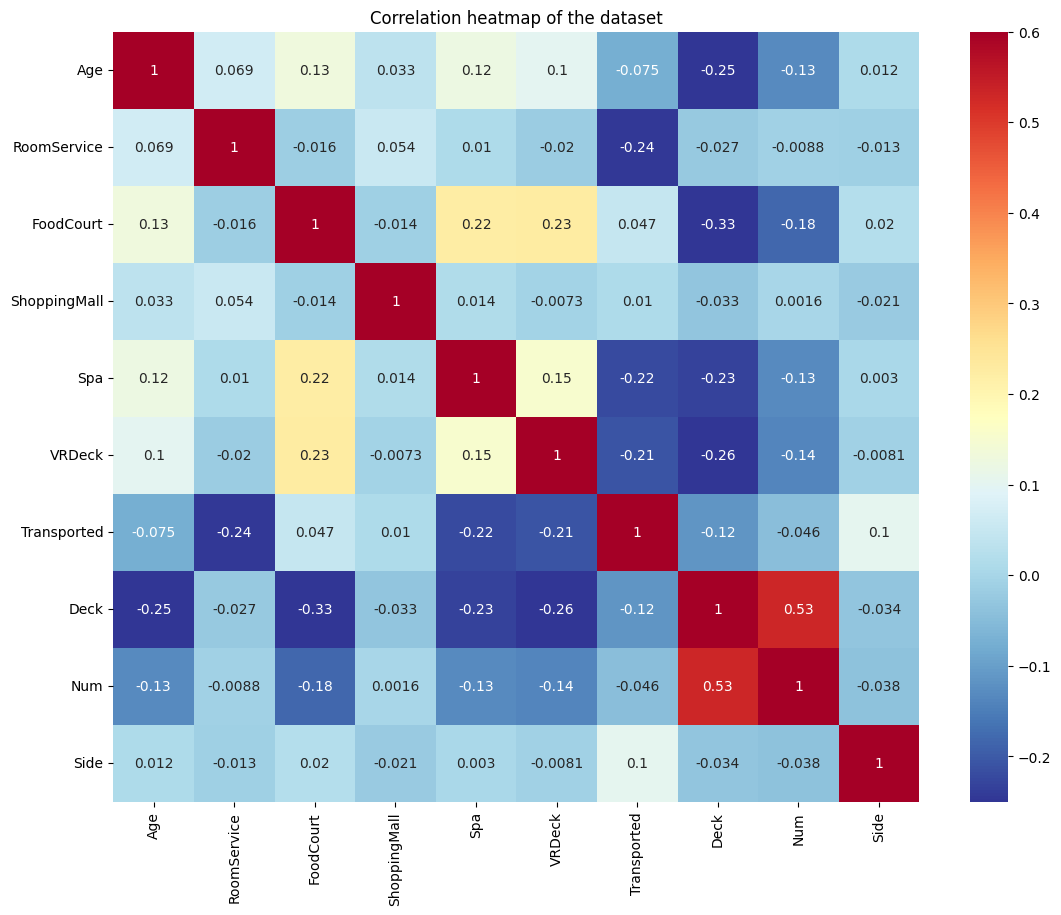

In [ ]:
display(data_train.corr(numeric_only=True))
plt.figure(figsize=(13,10))
sns.heatmap(data_train.corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation heatmap of the dataset')
plt.show()

In [ ]:

data_train_tr['Transported'] = data_train_tr['Transported'].astype(int)
print(data_train_tr['Transported'].dtype)

data_train_tr2 = data_train_tr[['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CryoSleep', 'Cabin', 'VIP','Transported']]

data_train_tr.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True)
print(data_train_tr.isnull().sum())



int32
PassengerId                  0
Age                          0
Dépense                      0
Cabin                        0
CryoSleep                    0
VIP                          0
Transported                  0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64


Accuracy: 0.5290396779758482
Confusion Matrix:
[[509 352]
 [467 411]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.59      0.55       861
           1       0.54      0.47      0.50       878

    accuracy                           0.53      1739
   macro avg       0.53      0.53      0.53      1739
weighted avg       0.53      0.53      0.53      1739



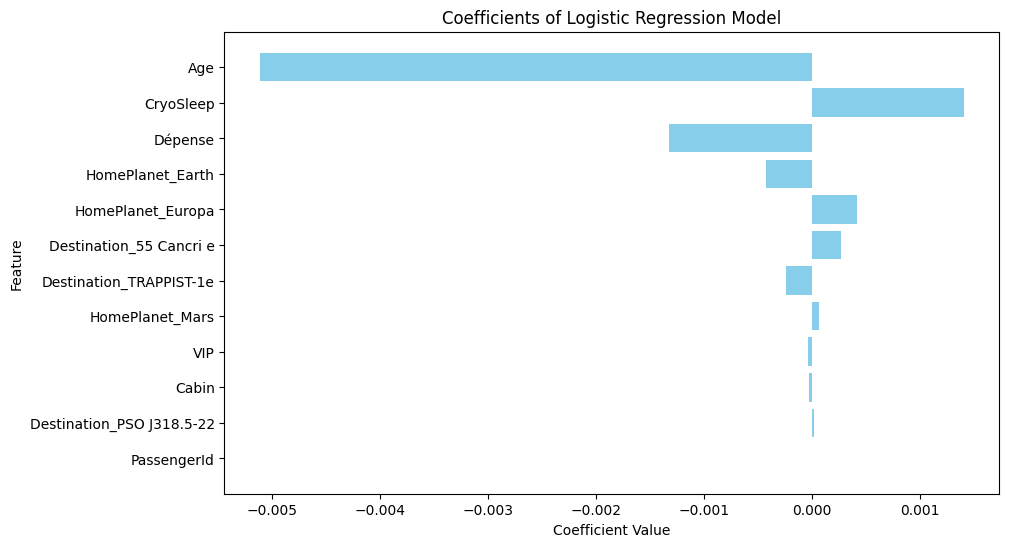

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Encodage des variables catégorielles et booléennes
label_encoders = {}
for column in ['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CryoSleep', 'Cabin', 'VIP']:
    le = LabelEncoder()
    data_train_tr[column] = le.fit_transform(data_train_tr[column].astype(str))
    label_encoders[column] = le
    

X = data_train_tr.drop('Transported', axis=1)
y = data_train_tr['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Obtenez les noms des caractéristiques
feature_names = X.columns

# Obtenez les coefficients du modèle
coefficients = logistic_regression_model.coef_[0]

# Triez les coefficients par valeur absolue pour une visualisation plus claire
sorted_indices = np.argsort(np.abs(coefficients))
sorted_feature_names = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_coefficients)), sorted_coefficients, color='skyblue')
plt.yticks(range(len(sorted_coefficients)), sorted_feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.show()


C:\Users\valen\AppData\Local\Temp\ipykernel_6612\983182566.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_tr2[column] = le.fit_transform(data_train_tr2[column].astype(str))
C:\Users\valen\AppData\Local\Temp\ipykernel_6612\983182566.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_tr2[column] = le.fit_transform(data_train_tr2[column].astype(str))
C:\Users\valen\AppData\Local\Temp\ipykernel_6612\983182566.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

Data_train_tr2 Accuracy: 0.7671075330649799
Confusion Matrix:
[[641 220]
 [185 693]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       861
           1       0.76      0.79      0.77       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



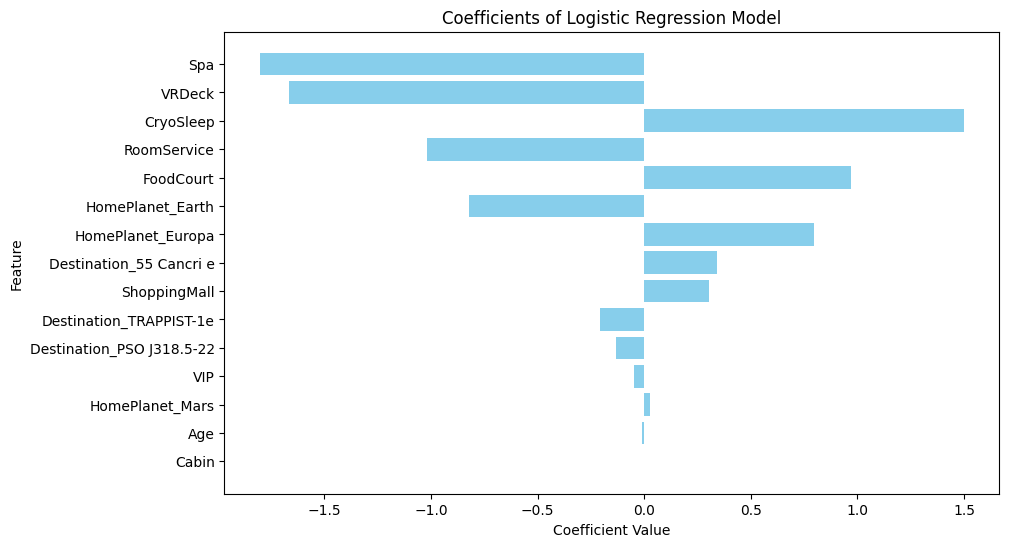

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Encodage des variables catégorielles et booléennes
label_encoders = {}
for column in ['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CryoSleep', 'Cabin', 'VIP']:
    le = LabelEncoder()
    data_train_tr2[column] = le.fit_transform(data_train_tr2[column].astype(str))
    label_encoders[column] = le

X = data_train_tr2.drop('Transported', axis=1)
y = data_train_tr2['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Data_train_tr2 Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Obtenez les noms des caractéristiques
feature_names = X.columns

# Obtenez les coefficients du modèle
coefficients = logistic_regression_model.coef_[0]

# Triez les coefficients par valeur absolue pour une visualisation plus claire
sorted_indices = np.argsort(np.abs(coefficients))
sorted_feature_names = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_coefficients)), sorted_coefficients, color='skyblue')
plt.yticks(range(len(sorted_coefficients)), sorted_feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.show()


La création de la colonne "Dépense" n'était pas une bonne idée. On remarque que sans elle le modèle de régression fonctionne mieux.
le graphique des coefficients nous montre que les variables de dépense Spa, VRDeck, Roomservice ont un coefficient négatif, ce qui suggère qu'elle ne sont pas ou peu liées à l'état Transported d'une personne, au contraire des variables FoodCourt et ShoppingMall. La création d'une variable où l'on les sommes a estompé cette différence.

Interpréter

Variables dépenses : voir s'il faut les combiner ou autre (impact du statut social sur

# Feature selection

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer

# Sélection des colonnes à utiliser
selected_columns = ['CryoSleep', 'Age', 'VIP', 'FoodCourt', 'Spa', 'VRDeck']

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
data_train_filled = imputer.fit_transform(data_train[selected_columns])

# Sélection des variables les plus pertinentes
X_new = SelectKBest(chi2, k=5).fit_transform(data_train_filled, data_train_tr['Transported'])

# Affichage des informations sur les nouvelles données
print(f'Original shape: {data_train[selected_columns].shape}')
print(f'New shape: {X_new.shape}')
print(X_new[:10])

# Convertir X_new en DataFrame pour pouvoir afficher les 10 premiers éléments facilement
X_new_df = pd.DataFrame(X_new, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

# Afficher les dix premières lignes
print(X_new_df.head(10))
display(X_new_df.info())
display(X_new_df.describe())


#modifier en utilisant data_train_tr au lieu d'imputer les valeurs manquantes

Original shape: (8693, 6)
New shape: (8693, 5)
[[0.00000000e+00 3.90000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 2.40000000e+01 9.00000000e+00 5.49000000e+02
  4.40000000e+01]
 [0.00000000e+00 5.80000000e+01 3.57600000e+03 6.71500000e+03
  4.90000000e+01]
 [0.00000000e+00 3.30000000e+01 1.28300000e+03 3.32900000e+03
  1.93000000e+02]
 [0.00000000e+00 1.60000000e+01 7.00000000e+01 5.65000000e+02
  2.00000000e+00]
 [0.00000000e+00 4.40000000e+01 4.83000000e+02 2.91000000e+02
  0.00000000e+00]
 [0.00000000e+00 2.60000000e+01 1.53900000e+03 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 2.80000000e+01 0.00000000e+00 0.00000000e+00
  3.04854791e+02]
 [0.00000000e+00 3.50000000e+01 7.85000000e+02 2.16000000e+02
  0.00000000e+00]
 [1.00000000e+00 1.40000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]
   Feature1  Feature2  Feature3  Feature4    Feature5
0       0.0      39.0       0.0       0.0    0.000000
1       0.0      24.0       9.0     549.0   

None

,Feature1,Feature2,Feature3,Feature4,Feature5
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.358306,28.827930,458.077203,311.138778,304.854791
std,0.473507,14.339054,1594.434978,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000
75%,1.000000,37.000000,118.000000,89.000000,71.000000
max,1.000000,79.000000,29813.000000,22408.000000,24133.000000


Now that the features have been selected, we are going to train our classifiers on the selected features.

# Training the models

### Data spliting

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, data_train['Transported'], test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (6954, 5)
Y_train shape: (6954,)
X_test shape: (1739, 5)
Y_test shape: (1739,)


### Logistic regression

**Training the model**

We will start by training a logistic regression model.

In [ ]:
reg = LogisticRegression()
reg.fit(X_train, Y_train)

print(f'Accuracy: {reg.score(X_test, Y_test)}')

scores = cross_val_score(reg, X_new, data_train['Transported'], cv=5)
print(f'Cross validation scores: {scores}')
print(f'Cross validation mean score: {scores.mean()}')
print(f'Cross validation standard deviation: {scores.std()}')

Accuracy: 0.7515813686026452
Cross validation scores: [0.75618171 0.75100633 0.75503163 0.76467204 0.76754891]
Cross validation mean score: 0.7588881220176668
Cross validation standard deviation: 0.006209392521309231


These results indicate that the logistic regression model achieved an accuracy of approximately 75.04% on the test set. Additionally, during the cross-validation process, the model obtained five different accuracy scores: 75.22%, 71.25%, 74.93%, 75.66%, and 72.27% for each fold, respectively.

The mean cross-validation score, which represents the average accuracy across all folds, is approximately 73.86%. The standard deviation of the cross-validation scores is approximately 1.77%, indicating the variability or consistency of the model's performance across different folds.

Overall, the model demonstrates a reasonably stable performance across different subsets of the data, with an average accuracy around 73.86%, suggesting that it generalizes well to unseen data.

We already have a good accuracy, but we will try to improve it by tuning the hyperparameters.

**Tuning the hyperparameters**

As we made variable selection, wee will try to make a model that uses all the features.